<a href="https://colab.research.google.com/github/DeepaliVerma/personal_files/blob/main/pytorch_basics_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Basics

In [ ]:
import torch

In [ ]:
x= torch.tensor(3.)
w= torch.tensor(4., requires_grad= True)
b= torch.tensor(5., requires_grad= True)

In [ ]:
#arithmetc operations
y= w *x + b
y

tensor(17., grad_fn=<AddBackward0>)

In [ ]:
y.backward()
y

tensor(17., grad_fn=<AddBackward0>)

In [ ]:
#display gradient
print('dy/dx:', x.grad)
print('dy/dw:', w.grad)
print('dy/db:', b.grad)

dy/dx: None
dy/dw: tensor(6.)
dy/db: tensor(2.)


Interoperability with Numpy

In [ ]:
import numpy as np

x = np.array([[1,2], [3,4]])
x

array([[1, 2],
       [3, 4]])

In [ ]:
#convert numpy to torch   # use same space in memory no created a copy
y = torch.from_numpy(x)
y

tensor([[1, 2],
        [3, 4]])

In [ ]:
# or   #this method create a copy and 
y = torch.tensor(x)
y

tensor([[1, 2],
        [3, 4]])

In [ ]:
#both have same type
x.dtype, y.dtype

(dtype('int64'), torch.int64)

In [ ]:
#convert tensor to numpy array
z = y.numpy()
z

array([[1, 2],
       [3, 4]])

 


*   array/list etc have arbitrary shapes but tensor have regular shape. numpy library are not written for gpu but tensors are made for gpu support
*   we need to write code in gpu using programming language CUDA



#basic linear regression

In [ ]:
import torch

In [ ]:
#training data
import numpy as np
inputs = np.array([[73,67,43],
                   [91,88,64],
                   [87,134,58],
                   [102,43,37],
                   [69,96,70]], dtype= 'float32') 

In [ ]:
#target data
targets = np.array([[50,70],
                   [91,101],
                   [87,134],
                   [102,43],
                   [69,96]], dtype= 'float32') 

In [ ]:
#Convert input and targets to tensors
inputs = torch.from_numpy(inputs)
targets = torch.from_numpy(targets)
print(inputs, targets)

tensor([[ 73.,  67.,  43.],
        [ 91.,  88.,  64.],
        [ 87., 134.,  58.],
        [102.,  43.,  37.],
        [ 69.,  96.,  70.]]) tensor([[ 50.,  70.],
        [ 91., 101.],
        [ 87., 134.],
        [102.,  43.],
        [ 69.,  96.]])


In [ ]:
#weights and biases
w = torch.randn(2,3, requires_grad = True)
b = torch.randn(2, requires_grad = True)
print(w)
print(b)

tensor([[ 0.4717,  0.4866,  0.8017],
        [ 0.8214,  1.0803, -0.6343]], requires_grad=True)
tensor([-0.4707,  0.4840], requires_grad=True)


In [ ]:
# linear layer
def model(x):
  return x @ w.t() + b

In [ ]:
#generate prediction
preds = model(inputs)
print(preds)

tensor([[101.0369, 105.5489],
        [136.5811, 129.6992],
        [152.2704, 179.9117],
        [ 98.2256, 107.2493],
        [134.9077, 116.4644]], grad_fn=<AddBackward0>)


In [ ]:
#compare with targets
print(targets)

tensor([[ 50.,  70.],
        [ 91., 101.],
        [ 87., 134.],
        [102.,  43.],
        [ 69.,  96.]])


#Loss Function

In [ ]:
#MSE loss
## step1: difference between two matrics
## step2 sq. all elements of the diffrence matrix to remove negative values
## calculate average of the elements in resulting matrix
def mse(t1, t2):
  diff = t1-t2
  return torch.sum(diff*diff) / diff.numel()

In [ ]:
#compute loss
loss = mse(preds, targets)
print(loss)

tensor(2204.2717, grad_fn=<DivBackward0>)


In [ ]:
#compute gradients
loss.backward()

In [ ]:
#gradients for weights
print(w)
print(w.grad)

tensor([[ 0.4717,  0.4866,  0.8017],
        [ 0.8214,  1.0803, -0.6343]], requires_grad=True)
tensor([[3542.9473, 4468.3359, 2674.2690],
        [3433.2979, 3157.3569, 1967.5933]])


In [ ]:
 print(b)
 print(b.grad)

tensor([-0.4707,  0.4840], requires_grad=True)
tensor([44.8043, 38.9747])




*   if gradient is positive, 
  1. increasing the elements value slightly will increase the loss.
  2.  decreasing the elements value slightly will decrease the loss
*   if gradient is negative,
  1. increasing the element value slightly will decrease the loss.
  2. decreasing the elements value slightly increase the loss.


In [ ]:
 #reset gradient back to zero
 w.grad.zero_()
 b.grad.zero_()
 print(w.grad)
 print(b.grad)

tensor([[0., 0., 0.],
        [0., 0., 0.]])
tensor([0., 0.])


#adjust weight and biases using gradient descent
1. generate predictions
2. calculate the loss
3. compute the gradient w.r.t weiht and biases
4. adjust the weights by subtracting a small quantity proportional to the gradient
5. reset the gradient to zero


In [ ]:
# generate prediction
preds = model(inputs)
print(preds) 

tensor([[101.0369, 105.5489],
        [136.5811, 129.6992],
        [152.2704, 179.9117],
        [ 98.2256, 107.2493],
        [134.9077, 116.4644]], grad_fn=<AddBackward0>)


In [ ]:
#adjust weights & reset gradients
with torch.no_grad():
  w -= w.grad * 1e-5
  b -= b.grad * 1e-5
  w.grad.zero_()
  b.grad.zero_()

In [ ]:
print(w)
print(b)

tensor([[ 0.4717,  0.4866,  0.8017],
        [ 0.8214,  1.0803, -0.6343]], requires_grad=True)
tensor([-0.4707,  0.4840], requires_grad=True)


In [ ]:
#calculate loss
preds = model(inputs)
loss = mse(preds, targets)
print(loss)

tensor(2204.2717, grad_fn=<DivBackward0>)


#Train for multiple epochs

In [ ]:
#train for 100 epochs
for i in range(100):
  preds = model(inputs)
  loss = mse(preds, targets)
  loss.backward()
  with torch.no_grad():
    w -= w.grad * 1e-5
    b -= b.grad * 1e-5
    w.grad.zero_()
    b.grad.zero_()

In [ ]:
# calculate loss
preds = model(inputs)
loss = mse(preds, targets)
print(loss)

tensor(183.5369, grad_fn=<DivBackward0>)


In [ ]:
#predictions
print(preds)
#Targets
print(targets)

tensor([[ 65.9759,  72.9457],
        [ 88.6204,  88.7104],
        [ 85.3738, 138.8310],
        [ 76.4216,  64.0538],
        [ 81.0210,  83.8856]], grad_fn=<AddBackward0>)
tensor([[ 50.,  70.],
        [ 91., 101.],
        [ 87., 134.],
        [102.,  43.],
        [ 69.,  96.]])


#Dataset and DataLoader

In [ ]:
import torch
import torch.nn as nn
import numpy as np
# Input (temp, rainfall, humidity)
inputs = np.array([[73, 67, 43], 
                   [91, 88, 64], 
                   [87, 134, 58], 
                   [102, 43, 37], 
                   [69, 96, 70], 
                   [74, 66, 43], 
                   [91, 87, 65], 
                   [88, 134, 59], 
                   [101, 44, 37], 
                   [68, 96, 71], 
                   [73, 66, 44], 
                   [92, 87, 64], 
                   [87, 135, 57], 
                   [103, 43, 36], 
                   [68, 97, 70]], 
                  dtype='float32')

# Targets (apples, oranges)
targets = np.array([[56, 70], 
                    [81, 101], 
                    [119, 133], 
                    [22, 37], 
                    [103, 119],
                    [57, 69], 
                    [80, 102], 
                    [118, 132], 
                    [21, 38], 
                    [104, 118], 
                    [57, 69], 
                    [82, 100], 
                    [118, 134], 
                    [20, 38], 
                    [102, 120]], 
                   dtype='float32')

inputs = torch.from_numpy(inputs)
targets = torch.from_numpy(targets)

In [ ]:
from torch.utils.data import TensorDataset

In [ ]:
#Define dataset
train_ds = TensorDataset(inputs, targets) #Tensordata allow smaall section of training data using indexing notation
train_ds[[1,3,5,7]]

(tensor([[ 91.,  88.,  64.],
         [102.,  43.,  37.],
         [ 74.,  66.,  43.],
         [ 88., 134.,  59.]]), tensor([[ 81., 101.],
         [ 22.,  37.],
         [ 57.,  69.],
         [118., 132.]]))

###Why slicing?
dataloader split the data into batches of predefined size while training

In [ ]:
from torch.utils.data import DataLoader

In [ ]:
# Define data Loader
batch_size = 5
train_dl= DataLoader(train_ds, batch_size, shuffle=True)

In [ ]:
for xb, yb in train_dl:
    print(xb)
    print(yb)
    break

tensor([[ 91.,  87.,  65.],
        [ 87., 135.,  57.],
        [ 91.,  88.,  64.],
        [ 74.,  66.,  43.],
        [ 88., 134.,  59.]])
tensor([[ 80., 102.],
        [118., 134.],
        [ 81., 101.],
        [ 57.,  69.],
        [118., 132.]])


In [ ]:
#Model
model = nn.Linear(3,2)
print(model.weight)
print(model.bias)

Parameter containing:
tensor([[ 0.1923,  0.1605,  0.2440],
        [-0.3330,  0.5443,  0.1162]], requires_grad=True)
Parameter containing:
tensor([-0.0518, -0.2067], requires_grad=True)


In [ ]:
#parameters
list(model.parameters())

[Parameter containing:
 tensor([[ 0.1923,  0.1605,  0.2440],
         [-0.3330,  0.5443,  0.1162]], requires_grad=True),
 Parameter containing:
 tensor([-0.0518, -0.2067], requires_grad=True)]

In [ ]:
#generate predictions
preds = model(inputs)
preds

tensor([[35.2366, 16.9517],
        [47.1943, 24.8294],
        [52.3444, 50.5029],
        [35.4976, -6.4666],
        [45.7114, 37.2075],
        [35.2684, 16.0744],
        [47.2778, 24.4013],
        [52.7808, 50.2861],
        [35.4658, -5.5892],
        [45.7631, 37.6567],
        [35.3202, 16.5237],
        [47.2261, 23.9520],
        [52.2609, 50.9310],
        [35.4459, -6.9158],
        [45.6796, 38.0848]], grad_fn=<AddmmBackward0>)

In [ ]:
#Build in loss function
import torch.nn.functional as F

In [ ]:
#Define loss function
loss_fn = F.mse_loss

In [ ]:
?F.mse_loss #help window

In [ ]:
loss = loss_fn(model(inputs), targets)
print(loss)

tensor(3343.7019, grad_fn=<MseLossBackward0>)


##Optimizer

In [ ]:
# Define optimizer
opt = torch.optim.SGD(model.parameters(), lr = 1e-5)

###Train the model

In [ ]:
#define utility function fit which train the model for a given number of epochs
def fit(num_epochs, model, loss_fn, opt):

  #repeat for given number of epochs
  for epoch in range(num_epochs):

    #Train with batches of data
    for xb, yb in train_dl:

      #1.Generate predictions
      pred = model(xb)

      #2.Calculate loss
      loss = loss_fn(pred, yb)

      #3. compute gradients
      loss.backward() 

      #4. update parameters using gradients
      opt.step()

      #5. Reset the gradient to zero
      opt.zero_grad()

    #Print the progress
    if (epoch+1) % 10 == 0:
      print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))


In [ ]:
#train model for 100 epoch
fit(100, model, loss_fn, opt)

Epoch [10/100], Loss: 199.9363
Epoch [20/100], Loss: 261.3291
Epoch [30/100], Loss: 59.2911
Epoch [40/100], Loss: 95.1832
Epoch [50/100], Loss: 89.7691
Epoch [60/100], Loss: 47.9109
Epoch [70/100], Loss: 38.2635
Epoch [80/100], Loss: 8.2544
Epoch [90/100], Loss: 30.8860
Epoch [100/100], Loss: 15.0395


In [ ]:
pred = model(inputs)
preds

tensor([[35.2366, 16.9517],
        [47.1943, 24.8294],
        [52.3444, 50.5029],
        [35.4976, -6.4666],
        [45.7114, 37.2075],
        [35.2684, 16.0744],
        [47.2778, 24.4013],
        [52.7808, 50.2861],
        [35.4658, -5.5892],
        [45.7631, 37.6567],
        [35.3202, 16.5237],
        [47.2261, 23.9520],
        [52.2609, 50.9310],
        [35.4459, -6.9158],
        [45.6796, 38.0848]], grad_fn=<AddmmBackward0>)

In [ ]:
targets

tensor([[ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.],
        [ 57.,  69.],
        [ 80., 102.],
        [118., 132.],
        [ 21.,  38.],
        [104., 118.],
        [ 57.,  69.],
        [ 82., 100.],
        [118., 134.],
        [ 20.,  38.],
        [102., 120.]])

In [ ]:
model(torch.tensor([[75, 63, 44.]]))

tensor([[54.8131, 67.3956]], grad_fn=<AddmmBackward0>)

#Image Classification using Logistic Regression in Pytorch

In [24]:
# Imports
import torch
import torchvision
from torchvision.datasets import MNIST

In [25]:
# Download training dataset
dataset = MNIST(root='data/', download=True)

In [26]:
len(dataset)

60000

In [27]:
test_dataset = MNIST(root='data/', train=False)
len(test_dataset)

10000

In [28]:
dataset[0]

(<PIL.Image.Image image mode=L size=28x28 at 0x7F5B8A42FC90>, 5)

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline

Label: 5


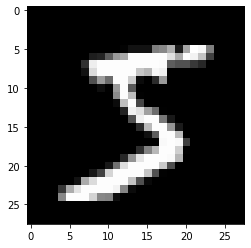

In [30]:
image, label = dataset[0]
plt.imshow(image, cmap='gray')
print('Label:', label)

Label: 3


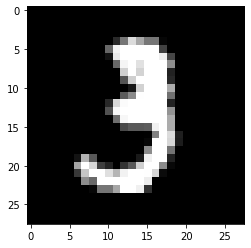

In [31]:
image, label = dataset[10]
plt.imshow(image, cmap='gray')
print('Label:', label)

In [32]:
import torchvision.transforms as transforms

In [33]:
# MNIST dataset (images and labels)
dataset = MNIST(root='data/', 
                train=True,
                transform=transforms.ToTensor())

In [34]:
img_tensor, label = dataset[0]
print(img_tensor.shape, label)

torch.Size([1, 28, 28]) 5


In [35]:
print(img_tensor[0,10:15,10:15])
print(torch.max(img_tensor), torch.min(img_tensor))

tensor([[0.0039, 0.6039, 0.9922, 0.3529, 0.0000],
        [0.0000, 0.5451, 0.9922, 0.7451, 0.0078],
        [0.0000, 0.0431, 0.7451, 0.9922, 0.2745],
        [0.0000, 0.0000, 0.1373, 0.9451, 0.8824],
        [0.0000, 0.0000, 0.0000, 0.3176, 0.9412]])
tensor(1.) tensor(0.)


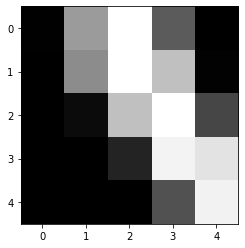

In [36]:
# Plot the image by passing in the 28x28 matrix
plt.imshow(img_tensor[0,10:15,10:15], cmap='gray');

In [37]:
#Training and Validation Datasets
from torch.utils.data import random_split

train_ds, val_ds = random_split(dataset, [50000, 10000])
len(train_ds), len(val_ds)

(50000, 10000)

In [38]:
from torch.utils.data import DataLoader

batch_size = 128

train_loader = DataLoader(train_ds, batch_size, shuffle=True)
val_loader = DataLoader(val_ds, batch_size)

In [39]:
import torch.nn as nn

input_size = 28*28
num_classes = 10

# Logistic regression model
model = nn.Linear(input_size, num_classes)

In [40]:
print(model.weight.shape)
model.weight

torch.Size([10, 784])


Parameter containing:
tensor([[ 0.0279, -0.0106, -0.0244,  ..., -0.0334, -0.0297, -0.0214],
        [-0.0107, -0.0087,  0.0196,  ...,  0.0041,  0.0179,  0.0261],
        [-0.0126, -0.0042,  0.0094,  ..., -0.0203,  0.0057,  0.0045],
        ...,
        [ 0.0116, -0.0344, -0.0331,  ...,  0.0125, -0.0196, -0.0161],
        [-0.0261, -0.0122,  0.0174,  ...,  0.0223, -0.0004,  0.0351],
        [-0.0086,  0.0097, -0.0156,  ...,  0.0089, -0.0066, -0.0151]],
       requires_grad=True)

In [41]:
import torch.nn as nn

input_size = 28*28
num_classes = 10

#Logistic regression model
model = nn.Linear(input_size, num_classes)

In [42]:
print(model.weight.shape)
model.weight

torch.Size([10, 784])


Parameter containing:
tensor([[ 0.0290,  0.0103, -0.0248,  ...,  0.0089,  0.0266, -0.0318],
        [-0.0049,  0.0301,  0.0064,  ..., -0.0108, -0.0121,  0.0057],
        [ 0.0337,  0.0278,  0.0235,  ..., -0.0273, -0.0230,  0.0250],
        ...,
        [ 0.0202,  0.0083, -0.0062,  ...,  0.0312, -0.0023,  0.0244],
        [ 0.0288,  0.0327,  0.0138,  ..., -0.0337, -0.0058,  0.0323],
        [-0.0215,  0.0110,  0.0057,  ...,  0.0063, -0.0261, -0.0208]],
       requires_grad=True)

In [43]:
print(model.bias.shape)

torch.Size([10])


In [44]:
#we will take 100 images from our dataset and pass them into the model
for images, labels in train_loader:
  print(labels)
  print(images.shape)
  outputs = model(images)
  break

tensor([8, 2, 5, 1, 0, 9, 3, 3, 3, 1, 1, 4, 9, 9, 6, 1, 3, 0, 9, 8, 7, 6, 2, 3,
        5, 0, 1, 0, 1, 0, 5, 9, 5, 3, 9, 0, 3, 6, 5, 8, 4, 6, 2, 7, 0, 2, 4, 1,
        1, 9, 5, 8, 6, 5, 4, 9, 2, 8, 5, 2, 7, 4, 0, 6, 2, 2, 8, 6, 0, 2, 4, 2,
        0, 1, 6, 9, 3, 7, 4, 5, 3, 1, 4, 1, 4, 5, 4, 3, 8, 2, 3, 9, 7, 2, 7, 8,
        1, 6, 5, 1, 4, 6, 9, 3, 7, 3, 8, 5, 1, 4, 0, 2, 5, 9, 6, 8, 1, 8, 1, 8,
        7, 1, 7, 3, 4, 7, 8, 0])
torch.Size([128, 1, 28, 28])


RuntimeError: ignored

There is an issue we pass image of 129, 1, 28,28 but model expect the dimension of 128, 784. So we reshape it and pass to the model


In [48]:
class MnistModel(nn.Module):
  def __init__(self):
    super().__init__()      # this implies inheritence concept when extending the class we need to make sure to call
                            #super constructor of the class
    self.linear = nn.Linear(input_size, num_classes)

  def forward(self, xb):   #self is instance of current object and foward method takes a batch of input
    xb = xb.reshape(-1, 784)    #why -1 : pytch automatically calculate what the dimension, -1 also helps to generalize the model rather than specific batch_size
    out = self.linear(xb)
    return out

model = MnistModel()

In [49]:
# now weights is lie under the model.linear
print(model.linear.weight.shape, model.linear.bias.shape)
list(model.parameters())

torch.Size([10, 784]) torch.Size([10])


[Parameter containing:
 tensor([[-0.0308,  0.0095,  0.0120,  ..., -0.0185,  0.0115, -0.0129],
         [ 0.0169, -0.0048,  0.0003,  ...,  0.0333,  0.0024, -0.0092],
         [ 0.0185, -0.0201, -0.0131,  ..., -0.0228,  0.0257, -0.0073],
         ...,
         [ 0.0084,  0.0111,  0.0133,  ...,  0.0344, -0.0094,  0.0151],
         [ 0.0301, -0.0129,  0.0322,  ...,  0.0183, -0.0082,  0.0284],
         [-0.0211, -0.0310,  0.0325,  ...,  0.0095, -0.0307,  0.0130]],
        requires_grad=True), Parameter containing:
 tensor([-0.0222, -0.0095, -0.0039, -0.0351,  0.0146, -0.0105, -0.0161,  0.0212,
          0.0165,  0.0276], requires_grad=True)]

In [52]:
#custom model
for images, labels in train_loader:
  outputs = model(images)
  break

print('outputs.shape:', outputs.shape) # we get 10 output for the every image, 10denotes 10 labels 
print('Sample outputs: \n', outputs[:2].data)

outputs.shape: torch.Size([128, 10])
Sample outputs: 
 tensor([[ 0.1442,  0.1066, -0.0389, -0.1106, -0.2843,  0.3006, -0.0392, -0.0411,
          0.2727,  0.0396],
        [ 0.0672, -0.1909, -0.4370,  0.1933, -0.1580,  0.2246,  0.4317,  0.0846,
          0.0264,  0.0652]])


We need these output as probability and all values lie between 0-1

In [54]:
#to convert output map into probability using softmax that makes everything positive and lies in between 0-1
import torch.nn.functional as F

#apply softmax for each output row
probs = F.softmax(outputs, dim=1)

#Look at sample probabilities
print("sample probabilities: \n", probs[:2].data)

#add up the probabilities of the output row
print("sum:", torch.sum(probs[0]).item()) #sum up to 1

sample probabilities: 
 tensor([[0.1100, 0.1059, 0.0916, 0.0852, 0.0716, 0.1286, 0.0915, 0.0914, 0.1251,
         0.0991],
        [0.1011, 0.0781, 0.0610, 0.1146, 0.0807, 0.1183, 0.1455, 0.1028, 0.0970,
         0.1009]])
sum: 1.0


In [55]:
#each of these probabilities we pick the best one
max_probs, preds = torch.max(probs, dim=1)
print(preds)
print(max_probs)

tensor([5, 6, 0, 3, 3, 3, 0, 8, 8, 6, 5, 9, 8, 3, 3, 9, 5, 6, 9, 8, 8, 5, 3, 0,
        0, 1, 9, 9, 3, 0, 3, 6, 8, 3, 9, 8, 5, 6, 8, 8, 3, 5, 1, 8, 8, 3, 8, 8,
        8, 3, 0, 3, 9, 3, 9, 8, 3, 0, 0, 8, 5, 0, 5, 8, 3, 0, 1, 3, 3, 0, 0, 8,
        3, 8, 8, 3, 3, 3, 8, 6, 3, 3, 5, 9, 5, 5, 8, 0, 0, 9, 1, 8, 9, 3, 1, 9,
        3, 3, 3, 4, 3, 3, 3, 5, 0, 1, 0, 8, 8, 3, 9, 8, 6, 3, 8, 9, 0, 5, 8, 8,
        3, 8, 8, 0, 5, 0, 5, 0])
tensor([0.1286, 0.1455, 0.1352, 0.1724, 0.1455, 0.1251, 0.1262, 0.1348, 0.1227,
        0.1252, 0.1407, 0.1252, 0.1569, 0.1358, 0.1299, 0.1298, 0.1306, 0.1257,
        0.1349, 0.1207, 0.1116, 0.1206, 0.1421, 0.1226, 0.1276, 0.1207, 0.1194,
        0.1438, 0.1263, 0.1214, 0.1320, 0.1507, 0.1291, 0.1299, 0.1409, 0.1295,
        0.1355, 0.1350, 0.1363, 0.1291, 0.1298, 0.1263, 0.1315, 0.1313, 0.1342,
        0.1260, 0.1141, 0.1406, 0.1321, 0.1209, 0.1252, 0.1357, 0.1292, 0.1380,
        0.1288, 0.1262, 0.1350, 0.1349, 0.1277, 0.1296, 0.1183, 0.1307, 0.1270,
       

In [56]:
#actual labels of the data
labels

tensor([1, 0, 5, 2, 9, 8, 3, 9, 4, 5, 8, 6, 5, 9, 4, 2, 8, 7, 9, 9, 3, 7, 9, 5,
        7, 1, 2, 8, 5, 7, 9, 6, 5, 7, 3, 5, 9, 8, 3, 4, 6, 1, 1, 2, 5, 0, 2, 7,
        3, 0, 9, 9, 3, 7, 0, 3, 3, 9, 8, 6, 9, 6, 3, 2, 0, 5, 1, 6, 2, 9, 1, 8,
        0, 3, 4, 6, 4, 7, 4, 6, 9, 7, 1, 3, 6, 7, 5, 5, 1, 3, 1, 3, 5, 9, 1, 9,
        0, 9, 6, 7, 9, 6, 0, 6, 1, 7, 9, 3, 5, 3, 3, 2, 6, 4, 8, 7, 1, 1, 5, 6,
        0, 8, 3, 1, 4, 4, 9, 1])

#Evaluation Metric and Loss Function

In [60]:
#for accurac
torch.sum(labels == preds) / len(labels)

tensor(0.1172)

In [61]:
def accuracy(l1, l2):
  return torch.sum(l1 == l2).item()/ len(l1)

In [65]:
accuray = accuracy(preds, labels)
accuray

0.1171875

Accuracy is not great way to evaluate a model (never used as a loss function) why?

1. its not differentiable function(gradient function uses differentiable function also).
torch.max and == both are non differentiable and non-continuous

2. it doesnt take into account the actual probabilities predicted by the model. so its cant provide sufficient feedback for incremental improvements

thats why accuracy is great evaluation metrics for classification, but not a good loss function

In [68]:
 # loss calculation
 #when x is small
 x= 0.1
 [0.1286, 0.1455, 0.1352, 0.1724, 0.1455, 0.1251, 0.1262, 0.1348,]
 [0,0,1,0,0,0,0,0]
 import math

 -math.log(x) #log goes increasing

2.3025850929940455

In [69]:
 #when x is large
 x= 0.7
 [0.1286, 0.1455, 0.1352, 0.1724, 0.1455, 0.1251, 0.1262, 0.1348,]
 [0,0,1,0,0,0,0,0]
 import math

 -math.log(x) #log goes descreasing

0.35667494393873245

In [70]:
#cross entropy is good loss function that is continuous and differentiable and provide good feedback for incremental improvement

In [71]:
loss_func = F.cross_entropy

In [72]:
#loss for current batch of data
loss = loss_func(outputs, labels)
print(loss)

tensor(2.3063, grad_fn=<NllLossBackward0>)


cross entropy is negative logarithm of the predicted probability of the correct label averaged overall training samples

Lower the loss, better the model

#optimizer

update the weights nad bias during the training but with a higher learning rate of 1e-3 

In [73]:
learning_rate = 0.01
optimizer = torch.optim.SGD(model.parameters(), lr= learning_rate)

#train the model

now we have defines the data loader, model, loss and optimizer, we are ready to train the model. The training process is almost identical to linear regression. However, we'll augment the fit function we defined earlier to evaluate the model's accuracy and loss using the validation set at the end of every epoch

In [75]:
#calculate loss for the batch of data
def loss_batch(model, loss_func, xb, yb, opt=None, metric=None):
  #claculate loss
  preds = model(xb)
  loss = loss_func(preds, yb)

  if opt is not None:
    #compute gradients
    loss.backward()
    #update parametrs
    opt.step()
    #reset gradients
    opt.zero_grad()

  metric_result =None
  if metric is not None:
    #compute the metric
    metric_result = metric(preds, yb)

  return loss.item(), len(xb), metric_result


#define evaluate function to calculate the overall loss (and a metric, if provided) for the validation set

In [78]:
#taking validation data and calculating overall loss and accuracy
def evaluate(model, loss_func, valid_dl, metric=None):
  with torch.no_grad():  #gradient goes gor gradient descent and it only work for training set
    #pass each batch through the model
    results = [loss_batch(model, loss_func, xb, yb, metric=metric) for xb, yb in valid_dl]

    # Seperate losses, counts and metrics
    losses, nums, metrics = zip(*results)
    #total size of dataset
    total = np.sum(nums)
    #Avg. loss across batches
    avg_loss = np.sum(np.multiply(losses, nums))/ total #avg loss: (first loss x batch_size + second loss x batch_size + ...) / total sample
    avg_metrics = None
    if metric is not None:
      #Avg of metric across batches
      avg_metric = np.sum(np.multiply(metrics, nums)) /total
  return avg_loss, total, avg_metric


In [79]:
def accuracy(outputs, labels):
  _, preds = torch.max(outputs, dim = 1)
  return torch.sum(preds == labels).item() / len(preds)

# we dont need to apply softmax here to the outputs, since it doesnt change the  relative order of the results. This is because e^x is an increasing function i.e., if y_1 >y_2, then e^y1 > e^y2 and same hold true after averaging out the values to get the softmax 

In [82]:
import numpy as np

In [84]:
val_loss, total, val_acc = evaluate(model, loss_func, val_loader, metric= accuracy)
print('loss: {: .4f}, Accuracy: {: .4f}'. format(val_loss, val_acc))

loss:  2.3264, Accuracy:  0.1034


fit function using loss_batch and evaluate

In [92]:
def fit(epochs, model, loss_func, opt, train_dl, valid_dl, metric=None):
  for epoch in range(epochs):
    #training
    for xb, yb in train_dl:
      loss, _, _ = loss_batch(model, loss_func, xb, yb, opt)

    #evaluation
    result = evaluate(model, loss_func, valid_dl, metric)
    val_loss, total, val_metric = result

    #print progress
    if metric is None:
      print('Epoch [{}/{}, Loss: {:.4f}'.format(epoch+1, epochs, val_loss))

    else:
      print('Epoch [{}/{}], Loss: {:.4f}, {}: {:.4f}'. format(epoch+1, epochs, val_loss, metric.__name__, val_loss))

In [93]:
#redefine model and optimizer
model = MnistModel()
optimizer = torch.optim.SGD(model.parameters(), lr= learning_rate)

In [94]:
fit(5, model, F.cross_entropy, optimizer, train_loader, val_loader, accuracy)

Epoch [1/5], Loss: 0.8852, accuracy: 0.8852
Epoch [2/5], Loss: 0.6611, accuracy: 0.6611
Epoch [3/5], Loss: 0.5703, accuracy: 0.5703
Epoch [4/5], Loss: 0.5192, accuracy: 0.5192
Epoch [5/5], Loss: 0.4853, accuracy: 0.4853


In [95]:
fit(5, model, F.cross_entropy, optimizer, train_loader, val_loader, accuracy)

Epoch [1/5], Loss: 0.4614, accuracy: 0.4614
Epoch [2/5], Loss: 0.4434, accuracy: 0.4434
Epoch [3/5], Loss: 0.4289, accuracy: 0.4289
Epoch [4/5], Loss: 0.4173, accuracy: 0.4173
Epoch [5/5], Loss: 0.4076, accuracy: 0.4076


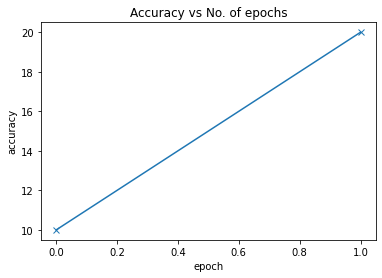

In [98]:
#plot accuracies
accuracies = [10, 20]
plt.plot(accuracies, '-x')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Accuracy vs No. of epochs');

#testing with individual images

In [99]:
#define test dataset
test_dataset = MNIST(root='data/', train= False, transform= transforms.ToTensor())

In [100]:
ls

data/  sample_data/


In [102]:
ls data/MNIST

raw/


Shape: torch.Size([1, 28, 28])
Label: 7


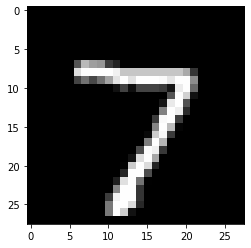

In [104]:
img, label = test_dataset[0]
plt.imshow(img[0], cmap='gray')
print('Shape:', img.shape)
print('Label:', label)

In [107]:
#create a batch of test images and perform prediction
#for batch we unsqueeze the tensor and expand the dimension (1x28x28) tensor to (1x1x28x28)
img.unsqueeze(0).shape


torch.Size([1, 1, 28, 28])

In [108]:
def predict_image(img, model):
  xb = img.unsqueeze(0)
  yb = model(xb)
  _, preds = torch.max(yb, dim = 1)
  return preds[0].item()

label: 7 predicted: 7


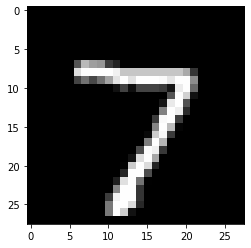

In [109]:
img, label = test_dataset[0]
plt.imshow(img[0], cmap = 'gray')
print('label:', label, 'predicted:', predict_image(img, model))

In [112]:
# test the overall loss and accuracy of the model
test_loader = DataLoader(test_dataset, batch_size=200)

test_loss, total, test_acc = evaluate(model, loss_func, test_loader, metric= accuracy)
print('Loss: {:.4f}, Accuracy: {:.4f}'.format(test_loss, test_acc))

Loss: 0.3950, Accuracy: 0.8971


#Saving and loading model 

In [113]:
torch.save(model.state_dict(), 'mnist-logistic.pth')

In [114]:
model.state_dict()

OrderedDict([('linear.weight',
              tensor([[ 0.0242,  0.0101, -0.0232,  ...,  0.0083,  0.0249,  0.0097],
                      [ 0.0342,  0.0259,  0.0028,  ...,  0.0044,  0.0300,  0.0142],
                      [ 0.0215, -0.0065, -0.0044,  ..., -0.0246, -0.0089, -0.0186],
                      ...,
                      [ 0.0021, -0.0287, -0.0331,  ..., -0.0067, -0.0012,  0.0056],
                      [-0.0187, -0.0219, -0.0284,  ...,  0.0047, -0.0161,  0.0111],
                      [ 0.0045, -0.0311,  0.0208,  ..., -0.0110,  0.0254,  0.0293]])),
             ('linear.bias',
              tensor([-0.0580,  0.1533, -0.0369, -0.0544,  0.0510,  0.2314, -0.0499,  0.1461,
                      -0.2854, -0.0730]))])

In [115]:
model2 = MnistModel()
model2.load_state_dict(torch.load('mnist-logistic.pth'))
model2.state_dict()

OrderedDict([('linear.weight',
              tensor([[ 0.0242,  0.0101, -0.0232,  ...,  0.0083,  0.0249,  0.0097],
                      [ 0.0342,  0.0259,  0.0028,  ...,  0.0044,  0.0300,  0.0142],
                      [ 0.0215, -0.0065, -0.0044,  ..., -0.0246, -0.0089, -0.0186],
                      ...,
                      [ 0.0021, -0.0287, -0.0331,  ..., -0.0067, -0.0012,  0.0056],
                      [-0.0187, -0.0219, -0.0284,  ...,  0.0047, -0.0161,  0.0111],
                      [ 0.0045, -0.0311,  0.0208,  ..., -0.0110,  0.0254,  0.0293]])),
             ('linear.bias',
              tensor([-0.0580,  0.1533, -0.0369, -0.0544,  0.0510,  0.2314, -0.0499,  0.1461,
                      -0.2854, -0.0730]))])

#both savin and loading have same value

In [116]:
test_loss, btotal, test_acc = evaluate(model, loss_func, test_loader, metric=accuracy)
print('Loss: {:.4f}, Accuracy: {:.4f}'.format(test_loss, test_acc))

Loss: 0.3950, Accuracy: 0.8971
